In [ ]:
import pandas as pd

# Spécifier les noms de colonnes à partir de la documentation UCI
columns = [
    "Status_Checking_Account", "Duration", "Credit_History", "Purpose", "Credit_Amount",
    "Savings", "Employment", "Installment_Rate", "Personal_Status_Sex", "Other_Debtors",
    "Present_Residence", "Property", "Age", "Other_Installment_Plans", "Housing",
    "Number_Credits", "Job", "People_Liable", "Telephone", "Foreign_Worker", "Target"
]

# Charger le fichier (remplace par le bon nom exact si besoin)
df = pd.read_csv("/content/german.data", sep=' ', names=columns)

# Convertir la cible en binaire (1 = bon crédit, 0 = défaut)
df['Target'] = df['Target'].map({1: 1, 2: 0})

# Afficher les premières lignes
df.head()


,Status_Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Liable,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [ ]:
df.describe()

,Duration,Credit_Amount,Installment_Rate,Present_Residence,Age,Number_Credits,People_Liable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Status_Checking_Account,0
Duration,0
Credit_History,0
Purpose,0
Credit_Amount,0
Savings,0
Employment,0
Installment_Rate,0
Personal_Status_Sex,0
Other_Debtors,0


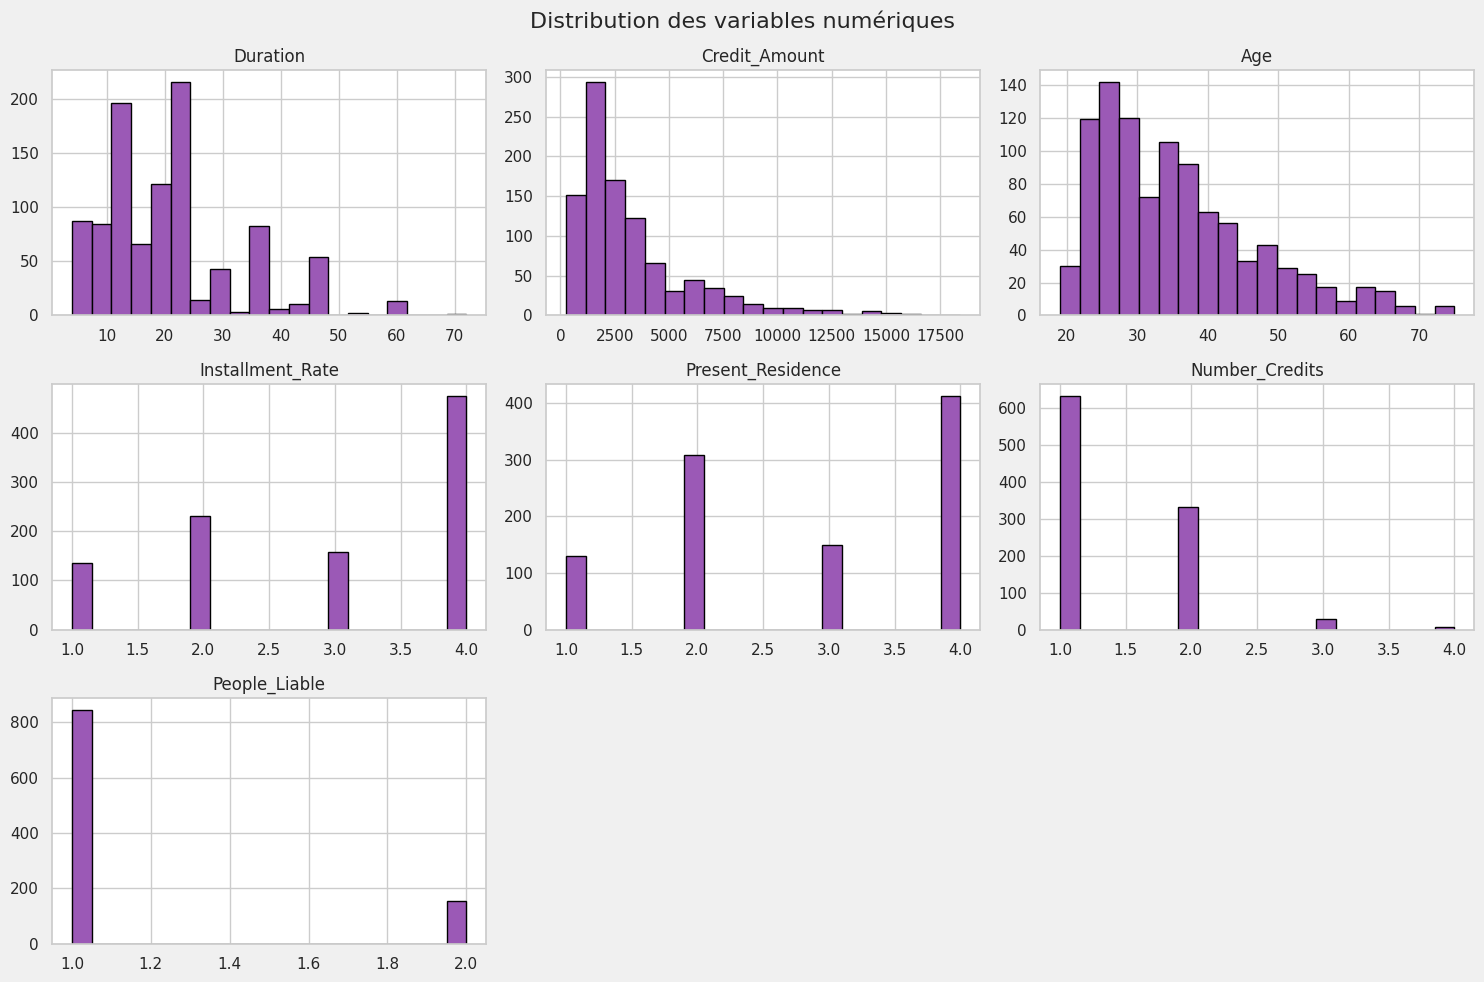

In [ ]:
# Étudier la distribution des variables numériques
# Liste des variables numériques (à adapter selon le besoin)
import matplotlib.pyplot as plt
numeric_cols = ['Duration', 'Credit_Amount', 'Age', 'Installment_Rate', 'Present_Residence',
                'Number_Credits', 'People_Liable']

# Histogrammes
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='#9B59B6', edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.show()


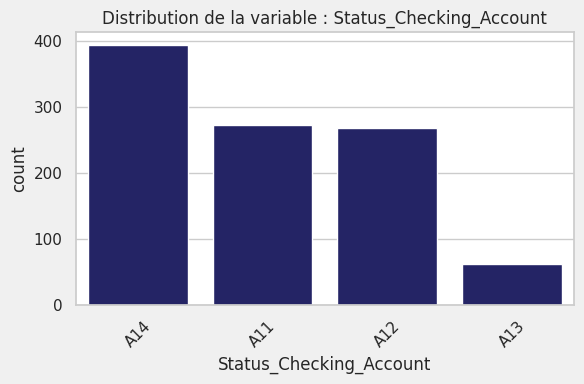

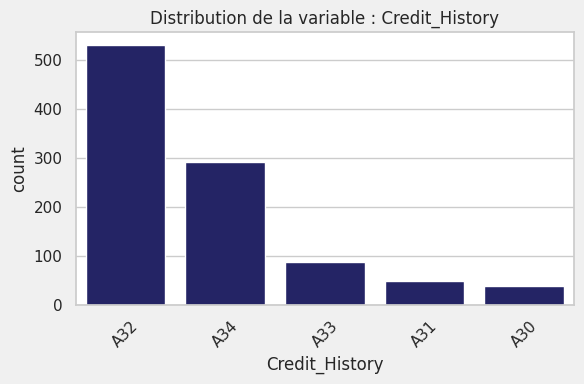

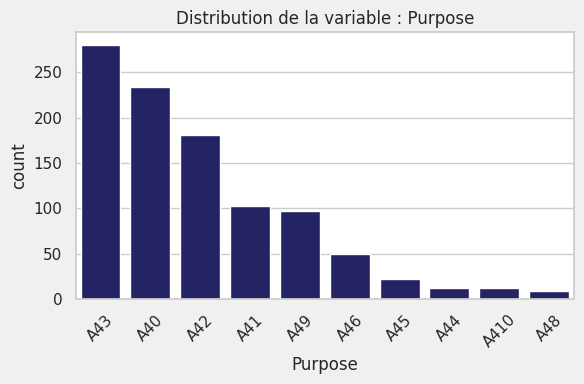

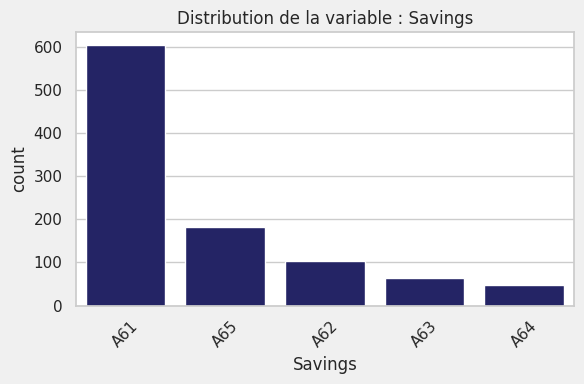

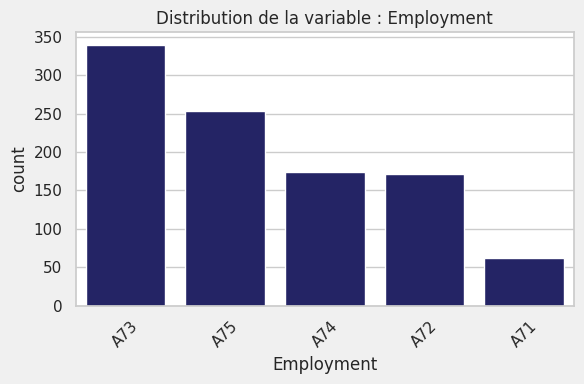

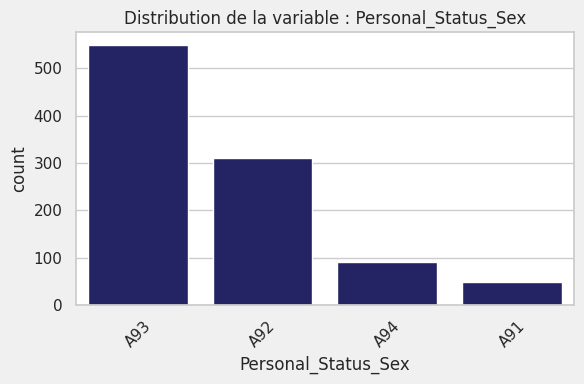

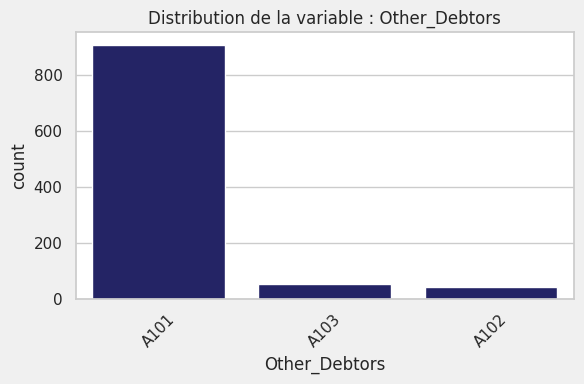

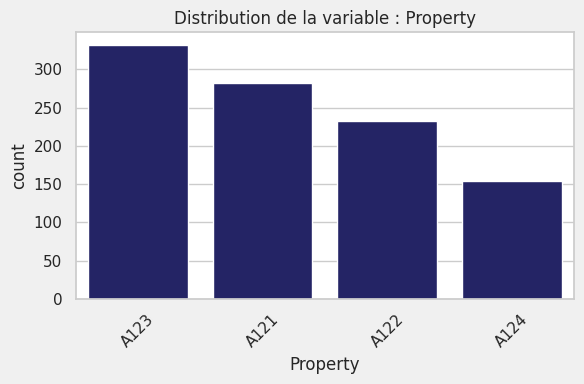

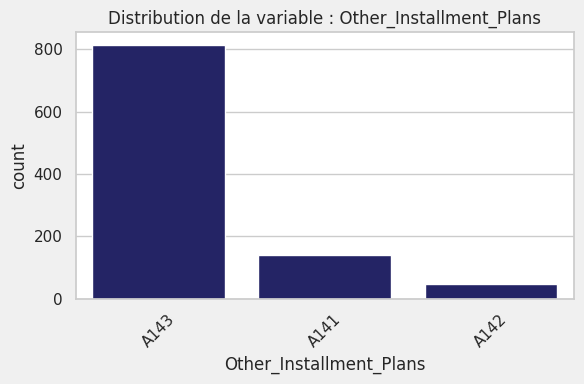

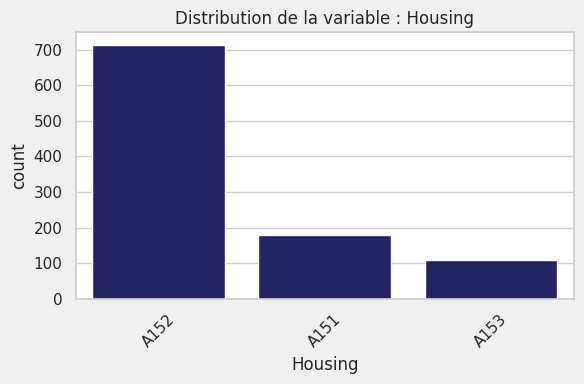

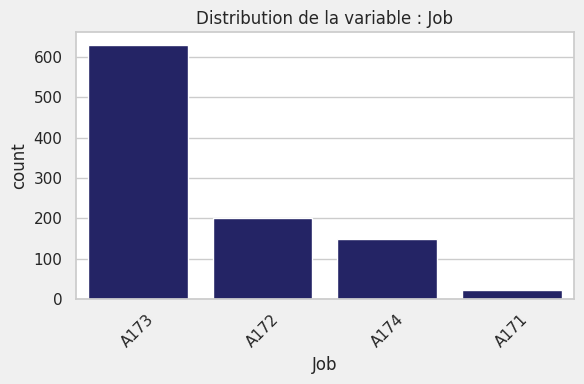

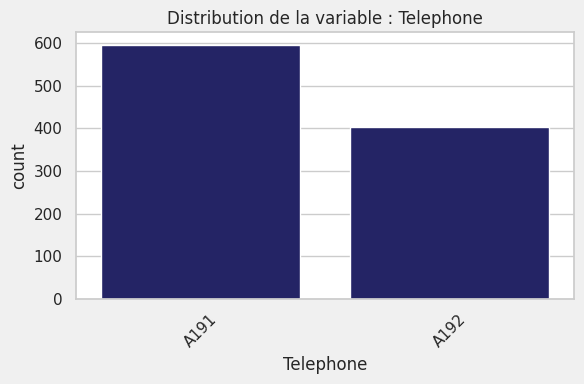

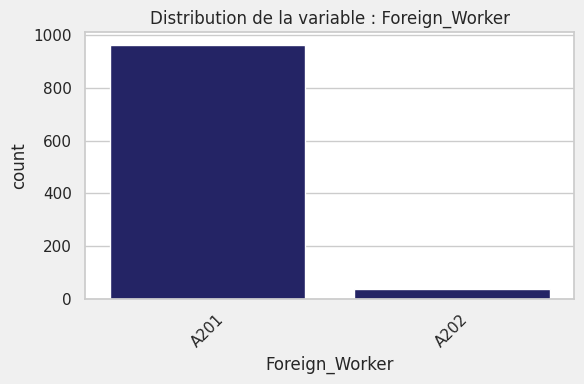

In [ ]:
# la distribution des variables catégorielles
# Détection automatique des variables catégorielles
import seaborn as sns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Tracer les diagrammes en barres
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='#191970')
    plt.xticks(rotation=45)
    plt.title(f"Distribution de la variable : {col}")
    plt.tight_layout()
    plt.gcf().patch.set_facecolor('#f0f0f0')
    plt.show()


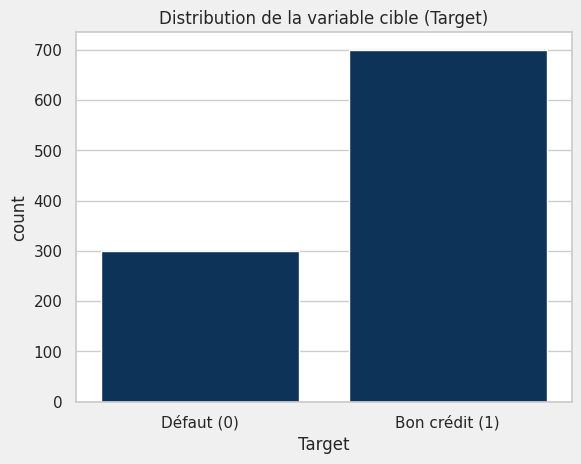


Répartition des classes :
Target
1    70.0
0    30.0
Name: proportion, dtype: float64 %


In [ ]:
#Distribution de la variable cible (Target)

sns.countplot(x='Target', data=df , color='#003366')
plt.title("Distribution de la variable cible (Target)")
plt.xticks([0, 1], ['Défaut (0)', 'Bon crédit (1)'])
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.show()

# Optionnel : pourcentage
counts = df['Target'].value_counts(normalize=True) * 100
print(f"\nRépartition des classes :\n{counts.round(2)} %")


In [ ]:
#Analyser les corrélations avec la variable cible.

from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()
cat_cols = df_corr.select_dtypes(include='object').columns

# Encodage label de toutes les variables catégorielles
le = LabelEncoder()
for col in cat_cols:
    df_corr[col] = le.fit_transform(df_corr[col])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Extraire la corrélation avec la variable cible
target_corr = corr_matrix['Target'].sort_values(ascending=False)

print("Corrélation avec la variable cible (Target):\n")
print(target_corr)


Corrélation avec la variable cible (Target):

Target                     1.000000
Status_Checking_Account    0.350847
Credit_History             0.228785
Savings                    0.178943
Employment                 0.116002
Other_Installment_Plans    0.109844
Age                        0.091127
Personal_Status_Sex        0.088184
Foreign_Worker             0.082079
Number_Credits             0.045732
Telephone                  0.036466
Other_Debtors              0.025137
Housing                    0.019315
People_Liable              0.003015
Purpose                   -0.001514
Present_Residence         -0.002967
Job                       -0.032735
Installment_Rate          -0.072404
Property                  -0.142612
Credit_Amount             -0.154739
Duration                  -0.214927
Name: Target, dtype: float64


<ipython-input-131-698099858>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


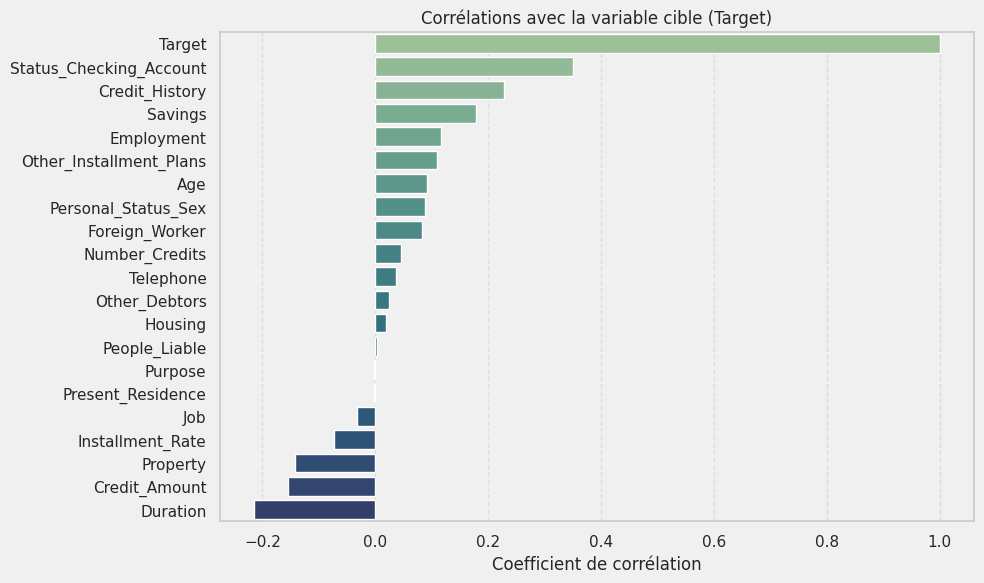

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer le nom de l’index (sinon il s'affiche comme "None")
target_corr.index.name = None

# Créer la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les barres
sns.barplot(
    x=target_corr.values,
    y=target_corr.index.astype(str),  # index converti en texte
    palette='crest',
    ax=ax
)

# Personnalisation
ax.set_title("Corrélations avec la variable cible (Target)")
ax.set_xlabel("Coefficient de corrélation")
ax.set_ylabel("")  # désactive l’étiquette d’axe y
ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
#  Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("Aucune valeur manquante détectée.")
else:
    print("Valeurs manquantes détectées :")
    print(missing_values)


Aucune valeur manquante détectée.


In [ ]:
#Encodage des variables catégorielles (One-hot encoding ou label encoding).

from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
# Normalisation ou standardisation des variables numériques.
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Duration', 'Credit_Amount', 'Age', 'Installment_Rate',
                'Present_Residence', 'Number_Credits', 'People_Liable']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
#split train , validation , test
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

# 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% train, 20% val (sur le 80% restant)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 × 0.8 = 0.2

# Résultat : 60% train, 20% val, 20% test


In [ ]:
# 3.Construction du modèle
#Définir une architecture de réseau de neurones classique (MLP : Multi-Layer Per-ceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_dim=61, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Régularisation
model.add(Dense(1, activation='sigmoid'))  # Sortie binaire

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Séparer les colonnes : X = caractéristiques, y = cible
X = df.iloc[:, :-1]  # les 20 premières colonnes (ou 24 selon version)
y = df.iloc[:, -1]   # la dernière colonne est la cible (1 = bon, 2 = mauvais)

# Encodage one-hot des colonnes catégorielles (automatique ici)
X_encoded = pd.get_dummies(X)

# Afficher le nombre de colonnes finales
print("Nombre de colonnes après encodage :", X_encoded.shape[1])


Nombre de colonnes après encodage : 20


In [ ]:
# On entraîne le modèle avec les données d'entraînement
#  Implémenter le modèle à l’aide de Keras, TensorFlow, PyTorch ou Scikit-learn.
from sklearn.preprocessing import LabelEncoder
# Encodage des colonnes de type texte (catégorielles)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Séparer X et y
X = df.drop('Target', axis=1)
y = df['Target']

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


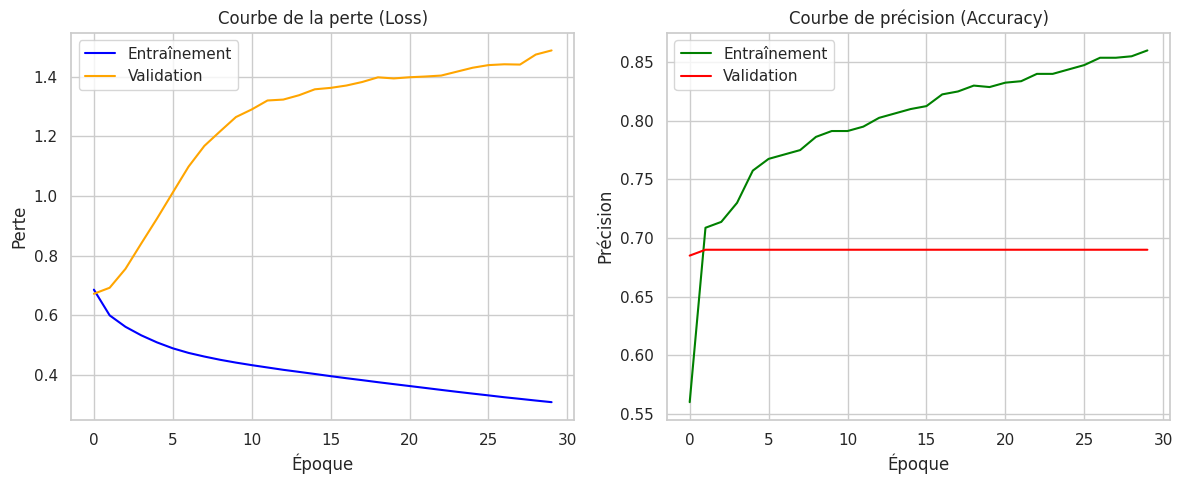

In [ ]:
# 4. Évaluation du modèle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


input_dim = X_train.shape[1]

model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16, verbose=0)

#courbes d’apprentissage
plt.figure(figsize=(12, 5))

# Perte (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entraînement', color='blue')
plt.plot(history.history['val_loss'], label='Validation',  color='orange')
plt.title('Courbe de la perte (Loss)')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.grid(True)
plt.legend()

# Précision (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entraînement', color='green')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Courbe de précision (Accuracy)')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#graph keep changing
import numpy as np
import tensorflow as tf
import random

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)


In [ ]:
#Calculer les métriques : précision, rappel, F1-score, AUC-ROC.
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Prédictions binaires
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_classes))

#  AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC :", auc)




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        59
           1       0.83      0.89      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200

AUC-ROC : 0.7919221060223585


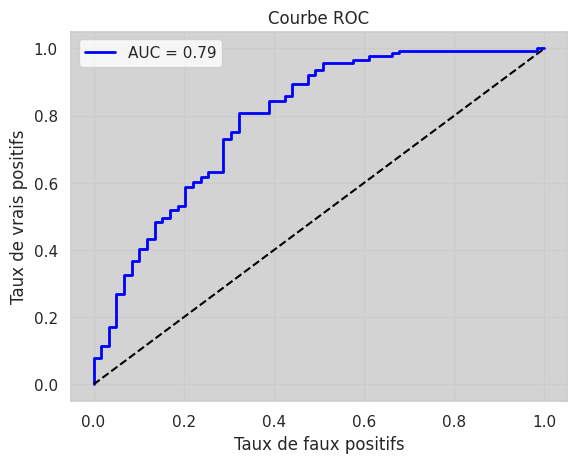

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate FPR, TPR
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Create the plot
fig, ax = plt.subplots()
ax.set_facecolor('lightgray')

# Plot the ROC curve
ax.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue', linewidth=2)
ax.plot([0, 1], [0, 1], linestyle='--', color='black')

# Labels and title
ax.set_xlabel("Taux de faux positifs")
ax.set_ylabel("Taux de vrais positifs")
ax.set_title("Courbe ROC")
ax.legend()
ax.grid(True)

plt.show()


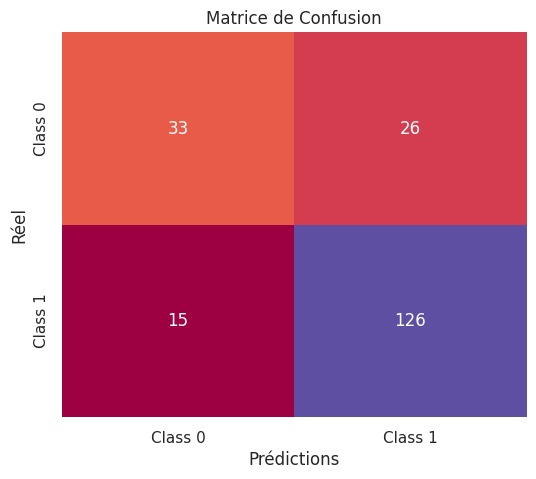

Vrais Négatifs (TN): 33
Faux Positifs (FP): 26
Faux Négatifs (FN): 15
Vrais Positifs (TP): 126


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions binaires
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# Interprétation de la matrice de confusion
TN, FP, FN, TP = cm.ravel()
print(f"Vrais Négatifs (TN): {TN}")
print(f"Faux Positifs (FP): {FP}")
print(f"Faux Négatifs (FN): {FN}")
print(f"Vrais Positifs (TP): {TP}")


In [ ]:
# 5. Améliorations et comparaison
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Construction du modèle avec régularisation L2 et Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # 30% des neurones désactivés pendant l'entraînement

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Couche de sortie pour la classification binaire
])

# Compilation
model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    verbose=0)  # Met verbose=1 si tu veux voir l'avancement

# Résumé
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)               │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,373 (40.52 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,916 (27.02 KB)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Normalisation (utile pour la régression logistique et le réseau)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 2. Régression logistique simple
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_val_scaled)

# 3. Évaluation de la régression logistique
print("=== Régression Logistique ===")
print(classification_report(y_val, y_pred_log))
print("Précision :", accuracy_score(y_val, y_pred_log))

# 4. Réseau de neurones simple
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer=Adam(0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = ann_model.fit(X_train_scaled, y_train,
                        validation_data=(X_val_scaled, y_val),
                        epochs=30, batch_size=32, verbose=0)

# 5. Évaluation du réseau de neurones
y_pred_ann = (ann_model.predict(X_val_scaled) > 0.5).astype("int32")

print("\n=== Réseau de Neurones (ANN) ===")
print(classification_report(y_val, y_pred_ann))
print("Précision :", accuracy_score(y_val, y_pred_ann))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.69      1.00      0.82       138

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.48      0.69      0.56       200

Précision : 0.69
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

=== Réseau de Neurones (ANN) ===
              precision    recall  f1-score   support

           0       0.33      0.02      0.03        62
           1       0.69      0.99      0.81       138

    accuracy                           0.69       200
   macro avg       0.51      0.50      0.42       200
weighted avg       0.58      0.69      0.57       200

Précision : 0.685


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Définir les paramètres à tester
hidden_layer_configs = [
    [32],            # 1 couche, 32 neurones
    [64],            # 1 couche, 64 neurones
    [64, 32],        # 2 couches
    [128, 64, 32]    # 3 couches
]

learning_rates = [0.01, 0.001, 0.0001]

# Boucle pour tester toutes les combinaisons
results = []

for config in hidden_layer_configs:
    for lr in learning_rates:
        # Créer un modèle
        model = Sequential()
        model.add(Dense(config[0], activation='relu', input_shape=(X_train.shape[1],)))
        for units in config[1:]:
            model.add(Dense(units, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compiler avec le taux d’apprentissage
        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        # Entraîner le modèle
        history = model.fit(X_train_scaled, y_train,
                            validation_data=(X_val_scaled, y_val),
                            epochs=20, batch_size=32, verbose=0)

        # Prédictions
        y_pred = (model.predict(X_val_scaled) > 0.5).astype("int32")
        acc = accuracy_score(y_val, y_pred)

        # Enregistrer les résultats
        results.append({
            'couches': config,
            'learning_rate': lr,
            'accuracy': acc
        })

# Affichage des résultats
print("=== Résultats des configurations testées ===")
for r in results:
    print(f"Couches : {r['couches']}, learning_rate = {r['learning_rate']} --> Précision : {r['accuracy']:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
=== Résultats des configurations testées ===
Couches : [32], learning_rate = 0.01 --> Précision : 0.7250
Couches : [32], learning_rate = 0.001 --> Précision : 0.6900
Couches : [32], learning_rate = 0.0001 --> Précision : 0.6900
Couches : [64], learning_rate = 0.01 --> Précision : 0.6800
Couches : [64], learning_rate = 0.001 --> Précision : 0.6900
Couches : [64], learning_rate = 0.0001 --> Précision : 0.7200
Couches : [64, 32], learning_rate = 0.01 --> Précision : 0.7400
Couches : [64, 32], learning_rate = 0.001 --> Précision : 0.7000
Couches : [64, 32], learning_rate = 0.0001 --> Précision : 0.6900
Couches : [128, 64, 32], learning_rate = 0.01 --> Précision : 0.7200
Couches : [128, 64, 32], learning_rate = 0.001 --> Précision : 0.6900
Couches : [128, 64, 32], learning_rate = 0.0001 --> Précision : 0.6900


PermutationExplainer explainer: 101it [00:16,  2.56it/s]


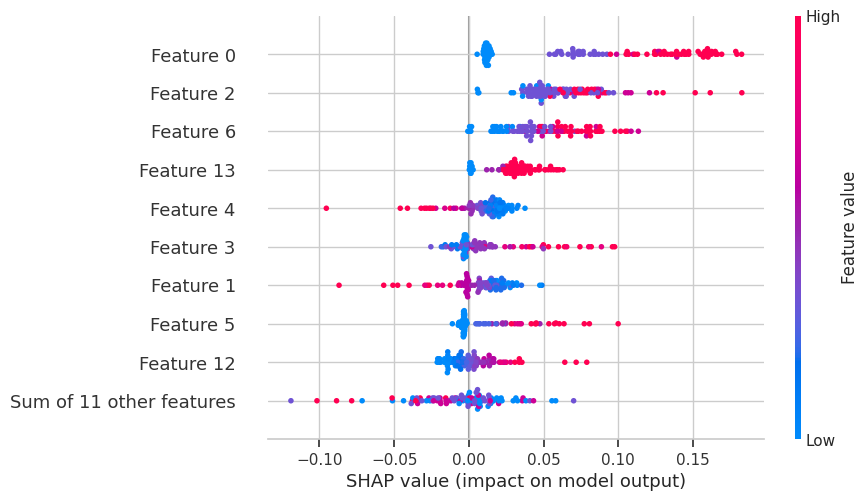

In [ ]:
# 6. Explicabilité du modèle (XAI)
import shap
import numpy as np

#  Échantillon représentatif (par exemple, 100 observations aléatoires)
X_sample = X_val_scaled[np.random.choice(X_val_scaled.shape[0], 100, replace=False)]

#  Créer l’explainer SHAP pour un modèle Keras
explainer = shap.Explainer(model, X_train_scaled)

# Calculer les valeurs SHAP
shap_values = explainer(X_sample)

# summary plot global
shap.plots.beeswarm(shap_values)


PermutationExplainer explainer: 101it [00:16,  2.56it/s]


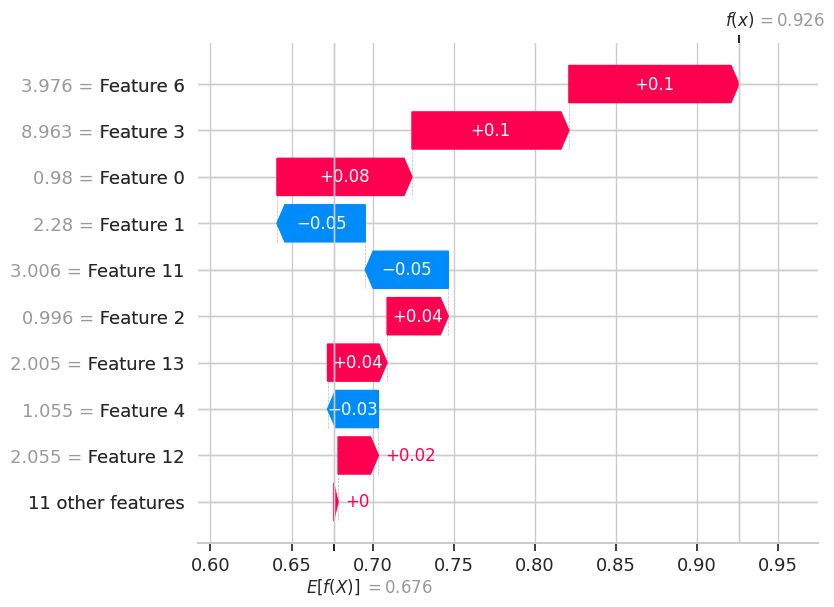

In [ ]:
# Analyser les contributions individuelles avec des force plots
import shap
import numpy as np

# 1. Sélection d’un individu (par exemple, le 0ᵉ)
X_sample = X_val_scaled[np.random.choice(X_val_scaled.shape[0], 100, replace=False)]
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_sample)

# 2. Force plot pour la première instance
shap.initjs()  # Pour activer l’affichage interactif dans Jupytershap.plots.force(shap_values[0], matplotlib=True)
shap.plots.waterfall(shap_values[0])



PermutationExplainer explainer: 101it [00:17,  2.34it/s]


<Figure size 1800x400 with 0 Axes>

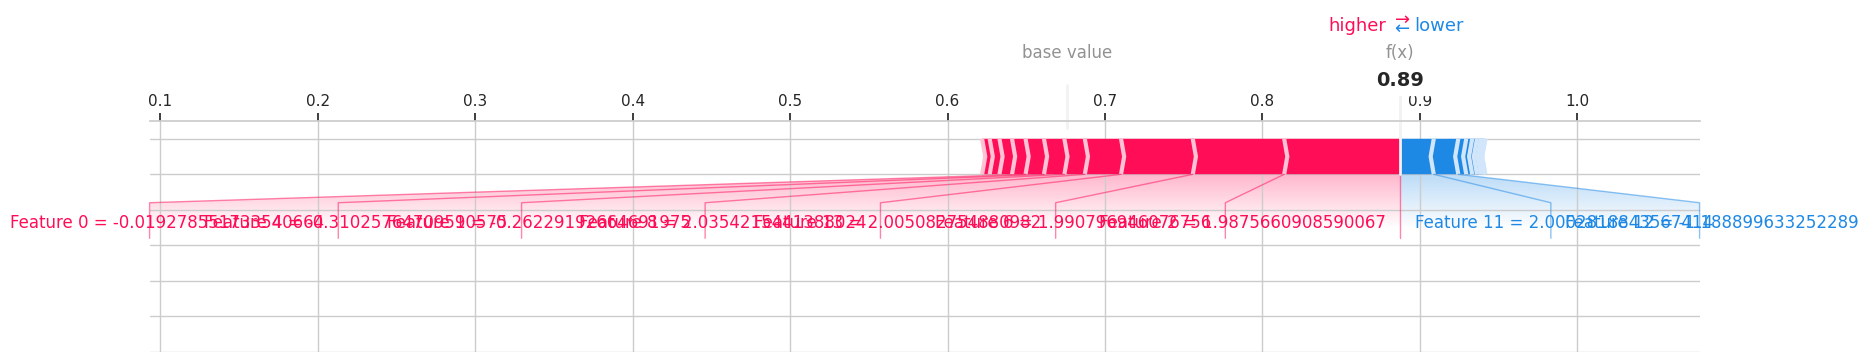

<Figure size 640x480 with 0 Axes>

In [ ]:
# Analyser les contributions individuelles avec des force plots
import shap
import numpy as np
import matplotlib.pyplot as plt

# Sélection d’un individu
X_sample = X_val_scaled[np.random.choice(X_val_scaled.shape[0], 100, replace=False)]
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_sample)

#Affichage du force plot avec taille augmentée
shap.initjs()  # Pour activer les visualisations interactives si besoin

plt.figure(figsize=(18, 4))
shap.plots.force(shap_values[0], matplotlib=True)
plt.tight_layout()
plt.show()


PermutationExplainer explainer: 101it [00:16,  2.33it/s]


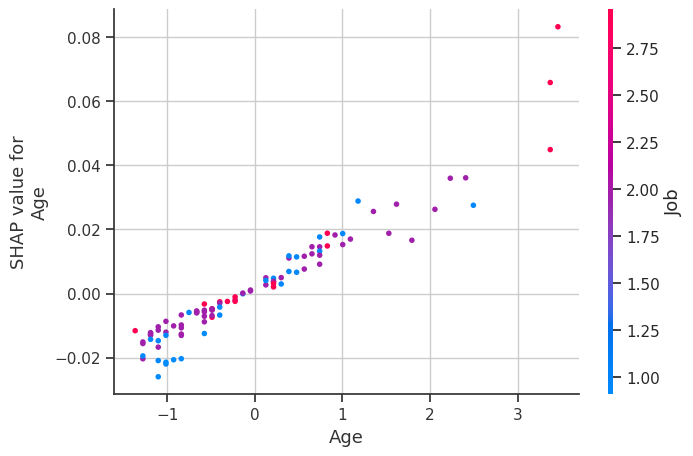

In [ ]:
import shap
import numpy as np


X_sample = X_val_scaled[np.random.choice(X_val_scaled.shape[0], 100, replace=False)]
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_sample)


feature_names = df.drop("Target", axis=1).columns

# Dependence plot pour variable Age
shap.dependence_plot("Age", shap_values.values, shap_values.data, feature_names=feature_names)



In [ ]:
## — Quantifier son impact moyen sur la prédiction (valeur SHAP moyenne)

import shap
import numpy as np
import pandas as pd

# 1. Échantillon représentatif (ex. 100 observations)
X_sample = X_val_scaled[np.random.choice(X_val_scaled.shape[0], 100, replace=False)]

# 2. Calcul des valeurs SHAP
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_sample)

# 3. Liste des noms de variables (si tu les as)
feature_names = df.drop("Target", axis=1).columns

# 4. Calcul de l’impact moyen (valeur SHAP absolue moyenne)
shap_mean_impact = np.abs(shap_values.values).mean(axis=0)

# 5. Tableau récapitulatif
df_impact = pd.DataFrame({
    "Variable": feature_names,
    "Impact_Moyen_SHAP": shap_mean_impact
}).sort_values(by="Impact_Moyen_SHAP", ascending=False)

# 6. Affichage des variables les plus influentes
print("\n\nVariables les plus influentes (valeurs SHAP moyennes):")
print(df_impact)


PermutationExplainer explainer: 101it [00:16,  2.52it/s]



Variables les plus influentes (valeurs SHAP moyennes):
                   Variable  Impact_Moyen_SHAP
0   Status_Checking_Account           0.090777
2            Credit_History           0.064391
6                Employment           0.049344
13  Other_Installment_Plans           0.030958
5                   Savings           0.020870
1                  Duration           0.017174
3                   Purpose           0.016911
4             Credit_Amount           0.016442
11                 Property           0.012999
12                      Age           0.012783
8       Personal_Status_Sex           0.012371
10        Present_Residence           0.007774
17            People_Liable           0.006615
7          Installment_Rate           0.006442
16                      Job           0.006057
14                  Housing           0.004937
9             Other_Debtors           0.002548
15           Number_Credits           0.002476
19           Foreign_Worker           0.002302
18 

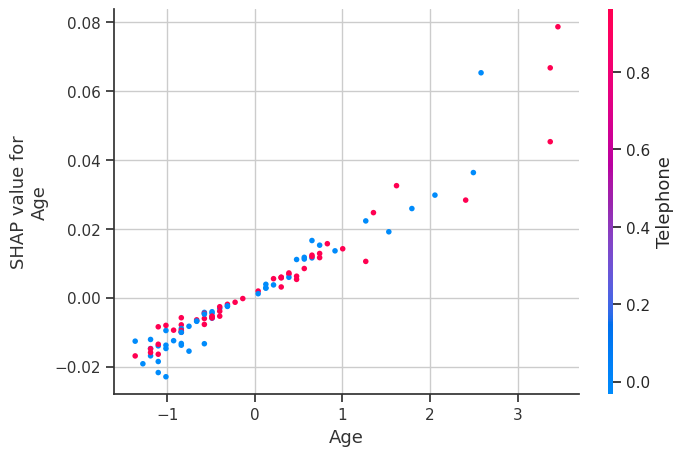

In [ ]:
# — Décrire comment sa variation affecte le risque de crédit
shap.dependence_plot("Age", shap_values.values, shap_values.data, feature_names=feature_names)


In [ ]:
#/projet_credit/

#├── /data/                  # Fichiers bruts et nettoyés
#├── /models/                # Modèle sauvegardé (ex: model.h5)
#├── app.py                  #  Interface Streamlit
#├── credit_modeling.ipynb   # Notebook d’analyse## requirements.txt        # Liste des dépendances#


In [ ]:
pip install streamlit


In [ ]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import shap
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Chargement
model = load_model("models/model.h5")
scaler = joblib.load("models/scaler.pkl")
feature_names = joblib.load("models/feature_names.pkl")

# Titre
st.set_page_config(page_title="Prédiction du Risque de Crédit")
st.title(" Application : Risque de Crédit")

# Menu
menu = st.sidebar.radio("Menu", ["Exploration statistique", "Système de prédiction"])

#  Exploration statistique
if menu == "Exploration statistique":
    st.header(" Exploration statistique")

    try:
        df = pd.read_csv("data/clean_data.csv")
        st.subheader("Statistiques descriptives")
        st.write(df.describe())

        st.subheader("Histogramme")
        variable = st.selectbox("Choisir une variable", df.columns[:-1])
        st.bar_chart(df[variable])

        st.subheader("Matrice de corrélation")
        st.dataframe(df.corr().style.background_gradient(cmap='coolwarm'))

    except FileNotFoundError:
        st.error("Le fichier 'data/clean_data.csv' est manquant.")

#  Prédiction
elif menu == "Système de prédiction":
    st.header(" Système de prédiction")

    st.markdown(" Veuillez remplir les caractéristiques du client : ")
    user_input = {}
    for feat in feature_names:
        user_input[feat] = st.number_input(f"{feat}", value=0.0)

    if st.button("Prédire"):
        input_df = pd.DataFrame([user_input])
        input_scaled = scaler.transform(input_df)
        prediction = model.predict(input_scaled)[0][0]

        result = " Crédit refusé (risque élevé)" if prediction > 0.5 else " Crédit accordé (risque faible)"
        st.subheader(f"Résultat : {result}")
        st.write(f"Score : `{prediction:.2f}`")

        # SHAP
        explainer = shap.Explainer(model, scaler.transform)
        shap_values = explainer(input_df)

        shap_df = pd.DataFrame({
            "feature": feature_names,
            "shap_value": shap_values.values[0]
        }).set_index("feature").abs().sort_values(by="shap_value", ascending=False).head(3)

        st.markdown(" Principales variables contributives :")
        for feat, row in shap_df.iterrows():
            st.write(f"- **{feat}** → impact absolu : `{row['shap_value']:.4f}`")

        # Force plot
        st.markdown("Visualisation SHAP")
        shap.initjs()
        fig = plt.figure(figsize=(20, 3))
        shap.plots.force(shap_values[0], matplotlib=True)
        st.pyplot(fig)


2025-06-16 21:46:31.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 21:46:31.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
model.save("models/model.h5")


In [ ]:
import joblib
import os

# Créer le dossier 'models/' s'il n'existe pas
os.makedirs("models", exist_ok=True)

# 1. Sauvegarder le scaler
joblib.dump(scaler, "models/scaler.pkl")

# 2. Sauvegarder la liste des noms de colonnes/features à partir du DataFrame original
# ⚠️ Assure-toi que tu as un DataFrame nommé 'df' contenant la colonne 'Target'
feature_names = df.drop("Target", axis=1).columns.tolist()
joblib.dump(feature_names, "models/feature_names.pkl")


['models/feature_names.pkl']

In [ ]:
model.save("models/model.h5")                          # Le modèle
joblib.dump(scaler, "models/scaler.pkl")              # Le StandardScaler
joblib.dump(X.columns.tolist(), "models/feature_names.pkl")  # Les noms des colonnes


['models/feature_names.pkl']

In [ ]:
# Crée un fichier requirements.txt avec les packages principaux
with open("requirements.txt", "w") as f:
    f.write("""streamlit
pandas
numpy
matplotlib
shap
scikit-learn
joblib
tensorflow
""")

# Affiche le contenu pour vérification
!cat requirements.txt


streamlit
pandas
numpy
matplotlib
shap
scikit-learn
joblib
tensorflow


In [ ]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r models.zip /content/models


  adding: content/models/ (stored 0%)
  adding: content/models/model.h5 (deflated 38%)
  adding: content/models/scaler.pkl (deflated 15%)
  adding: content/models/feature_names.pkl (deflated 24%)


In [ ]:
from google.colab import files
files.download("models.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
import pandas as pd
import os

# Charger le fichier
df_raw = pd.read_csv("/content/german.data", delim_whitespace=True, header=None)

# Ajouter les 21 noms de colonnes
column_names = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings',
    'Employment', 'InstallmentRate', 'SexAndStatus', 'OtherDebtors',
    'ResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans',
    'Housing', 'NumberCredits', 'Job', 'LiablePeople', 'Telephone', 'ForeignWorker',
    'Target'
]

df_raw.columns = column_names

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df_raw.drop("Target", axis=1))

# Encodage binaire de la cible : 1 (bon client) -- 0 ; 2 (mauvais client) -- 1
df_encoded["Target"] = df_raw["Target"].map({1: 0, 2: 1})

# Sauvegarde dans /data/
os.makedirs("data", exist_ok=True)
df_encoded.to_csv("data/clean_data.csv", index=False)

print(" Fichier 'clean_data.csv' bien enregistré dans /data/")


 Fichier 'clean_data.csv' bien enregistré dans /data/


<ipython-input-171-2313669355>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_raw = pd.read_csv("/content/german.data", delim_whitespace=True, header=None)


In [173]:
from google.colab import files
files.download("data/clean_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>